## TUGAS BESAR PROBABILITAS STATISTIKA IF2220

### Dibuat Oleh:
#### Hera Shafira - 13519131
#### Alvin Wilta - 13519163

# Spesifikasi Tugas
### 1. Menulis deskripsi statistika (Descriptive Statistics) dari semua kolom pada data yang bersifat
numerik, terdiri dari mean, median, modus, standar deviasi, variansi, range, nilai minimum,
maksimum, kuartil, IQR, skewness dan kurtosis. Boleh juga ditambahkan deskripsi lain.
### 2. Membuat Visualisasi plot distribusi, dalam bentuk histogram dan boxplot untuk setiap
kolom numerik. Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot
tersebut.
### 3. Menentukan setiap kolom numerik berdistribusi normal atau tidak. 
Gunakan normality test yang dikaitkan dengan histogram plot.
### 4. Melakukan test hipotesis 1 sampel, dengan menuliskan 6 langkah testing dan menampilkan
juga boxplotnya untuk kolom/bagian yang bersesuaian.
    a. Nilai rata-rata Daerah di atas 4700?
    b. Nilai Rata-rata Sumbu Utama tidak sama dengan 116?
    c. Nilai Rata-rata 20 baris pertama kolom Sumbu Kecil bukan 50?
    d. Proporsi nilai Diameter yang lebih dari 85, adalah tidak sama dengan 15% ?
    e. Proporsi nilai Keliling yang kurang dari 100, adalah kurang dari 5% ?
### 5. Melakukan test hipotesis 2 sampel, dengan menuliskan 6 langkah testing dan menampilkan
juga boxplotnya untuk kolom/bagian yang bersesuaian.
    a. Data kolom AreaBulatan dibagi 2 sama rata: bagian awal dan bagian akhir kolom.
        Benarkah rata-rata kedua bagian tersebut sama?
    b. Data kolom Kadar Air dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah
        rata-rata bagian awal lebih besar dari pada bagian akhir sebesar 0.2?
    c. Rata-rata 20 baris pertama kolom Bulatan sama dengan 20 baris terakhirnya?
    d. Proporsi nilai bagian awal Ransum yang lebih dari 2, adalah lebih besar daripada,
        proporsi nilai yang sama di bagian akhir Ransum?
    e. Bagian awal kolom Diameter memiliki variansi yang sama dengan bagian akhirnya?
### 6. Test korelasi: tentukan apakah setiap kolom non-target berkorelasi dengan kolom target,
dengan menggambarkan juga scatter plot nya. Gunakan correlation test.

In [1]:
#!pip install numpy
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn
#!pip install pylatex

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import matplotlib.pyplot as plt # data visualization with graph etc
import seaborn as sns # statistical data visualization
from scipy import stats #statistical data functions
from scipy.stats import norm # solving t value for critical value
from scipy.stats import f as fff # f-test
import scipy.stats as stats # statistical functions
import seaborn as sb # graphing tool
import math # math functions

df = pd.read_csv(r"C:\Users\Lenovo X1 Carbon\Alvin\Kuliah\Probstat\Gandum.csv", names = ["id","Daerah","SumbuUtama","SumbuKecil","Keunikan","AreaBulatan","Diameter","KadarAir","Keliling","Bulatan","Ransum","Kelas"])
df2 = df.copy()
df2.drop(['id', 'Kelas'], axis='columns', inplace=True)

# Bagian 1
 Menentukan Mean, Median, Modus, Standar Deviasi, Variansi, Range, IQR, Min, Max, Quartile, Skewness, dan Kurtosis dari data yang diberikan.
 
 Atribut (Kolom) dari id dan kelas tidak dibuat rata-rata dan 
 
 Modus hanya dibuat pada kelas karena modus pada atribut (kolom) lainnya kurang memiliki makna data yang berarti.

In [3]:
# mean, median, modus, standar deviasi, variansi, range, nilai minimum, maksimum, kuartil, IQR, skewness dan kurtosis
# Disini id dan Kelas tidak dibutuhkan rata-ratanya, sehingga dibuang.
print('Mean: ')
print(str(df.mean(axis=0)))
print()
# Modus tidak akan terpakai karena data yang dihasilkan trivial
print('Standar deviasi: ')
print(str(df.std()))

Mean: 
id              250.500000
Daerah         4801.246000
SumbuUtama      116.045171
SumbuKecil       53.715246
Keunikan          0.878764
AreaBulatan    4937.048000
Diameter         77.771158
KadarAir          0.648372
Keliling        281.479722
Bulatan           0.761737
Ransum            2.150915
Kelas             1.502000
dtype: float64

Standar deviasi: 
id              144.481833
Daerah          986.395491
SumbuUtama       18.282626
SumbuKecil        4.071075
Keunikan          0.036586
AreaBulatan    1011.696255
Diameter          8.056867
KadarAir          0.094367
Keliling         37.335402
Bulatan           0.061702
Ransum            0.249767
Kelas             0.500497
dtype: float64


In [4]:
out = df.describe()
skew = df.skew()
skew.name="Skewness"
out = out.append(skew)
kurt = df.kurtosis()
kurt.name="Kurtosis"
out = out.append(kurt)
iqr = df.quantile(0.75) - df.quantile(0.25)
iqr.name = "IQR"
out = out.append(iqr)
ranges = df.max() - df.min()
ranges.name = "Range"
out = out.append(ranges)
print(out)

                  id       Daerah  SumbuUtama  SumbuKecil    Keunikan  \
count     500.000000   500.000000  500.000000  500.000000  500.000000   
mean      250.500000  4801.246000  116.045171   53.715246    0.878764   
std       144.481833   986.395491   18.282626    4.071075    0.036586   
min         1.000000  2522.000000   74.133114   39.906517    0.719916   
25%       125.750000  4042.750000  104.116098   51.193576    0.863676   
50%       250.500000  4735.000000  115.405140   53.731199    0.890045   
75%       375.250000  5495.500000  129.046792   56.325158    0.907578   
max       500.000000  7453.000000  227.928583   68.977700    0.914001   
Skewness    0.000000     0.238144    0.761529   -0.010828   -1.623472   
Kurtosis   -1.200000    -0.434631    4.330534    0.475568    2.917256   
IQR       249.500000  1452.750000   24.930694    5.131582    0.043902   
Range     499.000000  4931.000000  153.795469   29.071182    0.194085   

          AreaBulatan    Diameter    KadarAir    K

# Bagian 2

Membuat Visualisasi plot distribusi, dalam bentuk histogram dan boxplot untuk setiap
kolom numerik. Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot tersebut.

<AxesSubplot:ylabel='Frequency'>

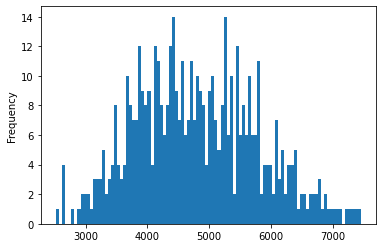

In [5]:
df.Daerah.plot.hist(bins=100)

<AxesSubplot:>

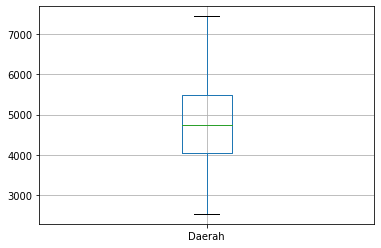

In [6]:
df.boxplot(["Daerah"])

### Penjelasan :
Berdasarkan plotting di atas, dapat terlihat bahwa distribusi ini berbentuk positively skewed yang berarti sebagian besar data berada di nilai rendah. Kemudian, distribusi ini termasuk distribusi yang platykurtic karena memiliki nilai kurtosis < 3. Mean atau nilai rata-rata dari distribusi ini bernilai 4801.246 dengan standar deviasi bernilai 986.395491. Kemudian, nilai maksimum dari distribusi ini adalah 7453 dengan nilai minimum sebesar 2522 sehingga jangkauan data dari distribusi ini bernilai 4931 dengan IQR yang bernilai 1452.75. persebaran ini tidak memiliki pencilan.

## SumbuUtama

<AxesSubplot:ylabel='Frequency'>

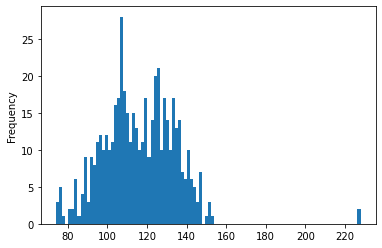

In [7]:
df.SumbuUtama.plot.hist(bins=100)

<AxesSubplot:>

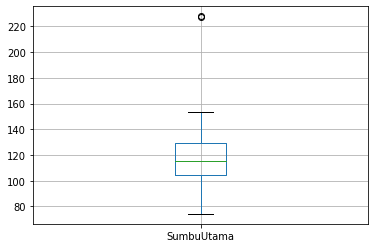

In [8]:
df.boxplot(["SumbuUtama"])

### Penjelasan :
Berdasarkan plotting di atas, dapat terlihat bahwa distribusi ini berbentuk positively skewed yang berarti sebagian besar data berada di nilai rendah. Kemudian, distribusi ini termasuk distribusi yang leptokurtic karena memiliki nilai kurtosis > 3. Mean atau nilai rata-rata dari distribusi ini bernilai 116.045171 dengan standar deviasi bernilai 18.282626. Kemudian, nilai maksimum dari distribusi ini adalah 227.928583 dengan nilai minimum sebesar 74.133114 sehingga jangkauan data dari distribusi ini bernilai 153.795469 dengan IQR yang bernilai 24.930694. persebaran ini memiliki pencilan pada range data 220 hingga 240.

## SumbuKecil

<AxesSubplot:ylabel='Frequency'>

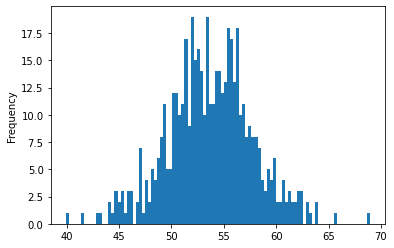

In [9]:
df.SumbuKecil.plot.hist(bins=100)

<AxesSubplot:>

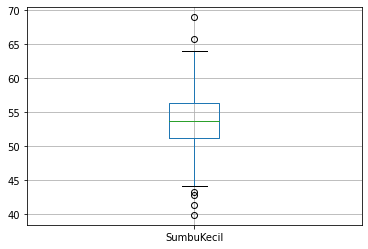

In [10]:
df.boxplot(["SumbuKecil"])

### Penjelasan :
Berdasarkan plotting di atas, dapat terlihat bahwa distribusi ini berbentuk negatively skewed yang berarti sebagian besar data berada di nilai tinggi. Kemudian, distribusi ini termasuk distribusi yang platykurtic karena memiliki nilai kurtosis < 3. Mean atau nilai rata-rata dari distribusi ini bernilai 53.715246 dengan standar deviasi bernilai 4.071075. Kemudian, nilai maksimum dari distribusi ini adalah 68.977700 dengan nilai minimum sebesar 39.906517 sehingga jangkauan data dari distribusi ini bernilai 29.071182 dengan IQR yang bernilai 5.131582. persebaran ini memiliki pencilan pada range data 40 hingga 45 dan 65 hingga 70.

## Keunikan

<AxesSubplot:ylabel='Frequency'>

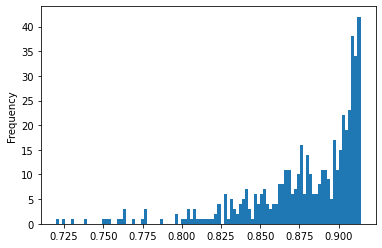

In [11]:
df.Keunikan.plot.hist(bins=100)

<AxesSubplot:>

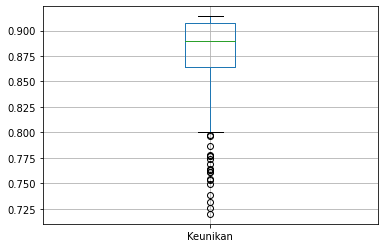

In [12]:
df.boxplot(["Keunikan"])

### Penjelasan :
Berdasarkan plotting di atas, dapat terlihat bahwa distribusi ini berbentuk negatively skewed yang berarti sebagian besar data berada di nilai tinggi. Kemudian, distribusi ini termasuk distribusi yang platykurtic karena memiliki nilai kurtosis < 3. Mean atau nilai rata-rata dari distribusi ini bernilai 0.878764 dengan standar deviasi bernilai 0.036586. Kemudian, nilai maksimum dari distribusi ini adalah 0.914001 dengan nilai minimum sebesar 0.719916 sehingga jangkauan data dari distribusi ini bernilai 0.194085 dengan IQR yang bernilai 0.043902. persebaran ini memiliki pencilan pada range data 0.700 hingga 0.800.

## AreaBulatan

<AxesSubplot:ylabel='Frequency'>

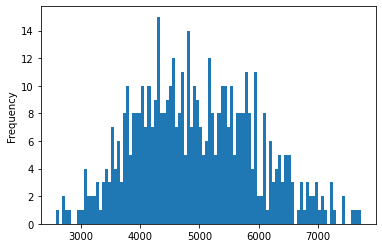

In [13]:
df.AreaBulatan.plot.hist(bins=100)

<AxesSubplot:>

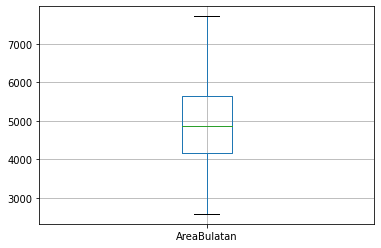

In [14]:
df.boxplot(["AreaBulatan"])

### Penjelasan :
Berdasarkan plotting di atas, dapat terlihat bahwa distribusi ini berbentuk positively skewed yang berarti sebagian besar data berada di nilai rendah. Kemudian, distribusi ini termasuk distribusi yang platykurtic karena memiliki nilai kurtosis < 3. Mean atau nilai rata-rata dari distribusi ini bernilai 4937.048 dengan standar deviasi bernilai 1011.696255. Kemudian, nilai maksimum dari distribusi ini adalah 7720 dengan nilai minimum sebesar 2579 sehingga jangkauan data dari distribusi ini bernilai 5141 dengan IQR yang bernilai 1484. Persebaran ini tidak memiliki pencilan.

## Diameter

<AxesSubplot:ylabel='Frequency'>

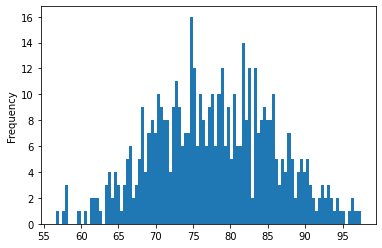

In [15]:
df.Diameter.plot.hist(bins=100)

<AxesSubplot:>

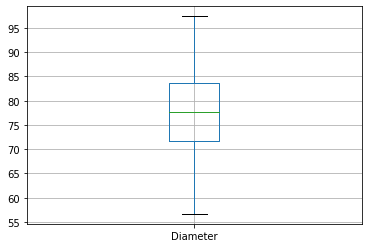

In [16]:
df.boxplot(["Diameter"])

### Penjelasan :
Berdasarkan plotting di atas, dapat terlihat bahwa distribusi ini hampir berbentuk distribusi simetris karena memiliki nilai skewness yang mendekati 0 yaitu 0.002725. Kemudian, distribusi ini termasuk distribusi yang platykurtic karena memiliki nilai kurtosis < 3. Mean atau nilai rata-rata dari distribusi ini bernilai 77.771158 dengan standar deviasi bernilai 8.056867. Kemudian, nilai maksimum dari distribusi ini adalah 97.413830 dengan nilai minimum sebesar 56.666658 sehingga jangkauan data dari distribusi ini bernilai 40.747172 dengan IQR yang bernilai 11.903290. Persebaran ini tidak memiliki pencilan.

## KadarAir

<AxesSubplot:ylabel='Frequency'>

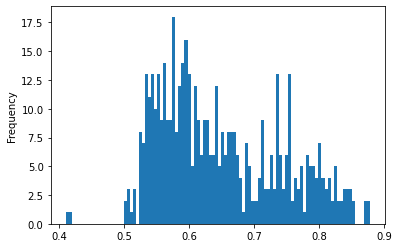

In [17]:
df.KadarAir.plot.hist(bins=100)

<AxesSubplot:>

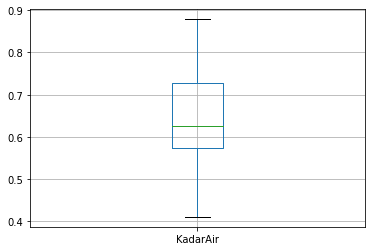

In [18]:
df.boxplot(["KadarAir"])

### Penjelasan :
Berdasarkan plotting di atas, dapat terlihat bahwa distribusi ini berbentuk positively skewed yang berarti sebagian besar data berada di nilai rendah. Kemudian, distribusi ini termasuk distribusi yang platykurtic karena memiliki nilai kurtosis < 3. Mean atau nilai rata-rata dari distribusi ini bernilai 0.648372 dengan standar deviasi bernilai 0.094367. Kemudian, nilai maksimum dari distribusi ini adalah 0.878899 dengan nilai minimum sebesar 0.409927 sehingga jangkauan data dari distribusi ini bernilai 0.468972 dengan IQR yang bernilai 0.154001. Persebaran ini tidak memiliki pencilan.

## Keliling

<AxesSubplot:ylabel='Frequency'>

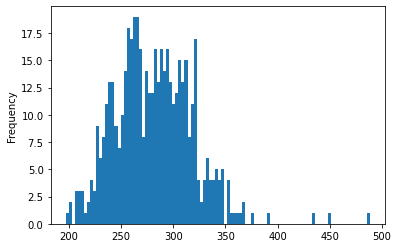

In [19]:
df.Keliling.plot.hist(bins=100)

<AxesSubplot:>

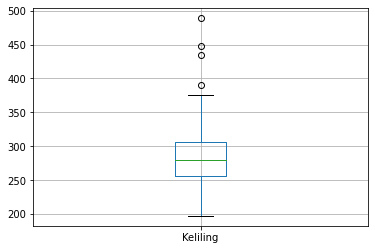

In [20]:
df.boxplot(["Keliling"])

### Penjelasan :
Berdasarkan plotting di atas, dapat terlihat bahwa distribusi ini berbentuk positively skewed yang berarti sebagian besar data berada di nilai rendah. Kemudian, distribusi ini termasuk distribusi yang platykurtic karena memiliki nilai kurtosis < 3. Mean atau nilai rata-rata dari distribusi ini bernilai 281.479722 dengan standar deviasi bernilai 37.335402. Kemudian, nilai maksimum dari distribusi ini adalah 488.837 dengan nilai minimum sebesar 197.015 sehingga jangkauan data dari distribusi ini bernilai 291.822 dengan IQR yang bernilai 50.1795. Persebaran ini memiliki pencilan pada range data 330-500.

## Bulatan

<AxesSubplot:ylabel='Frequency'>

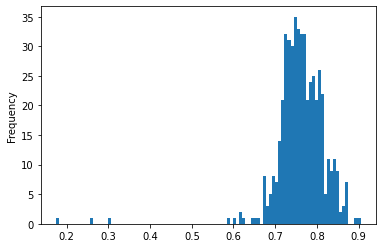

In [21]:
df.Bulatan.plot.hist(bins=100)

<AxesSubplot:>

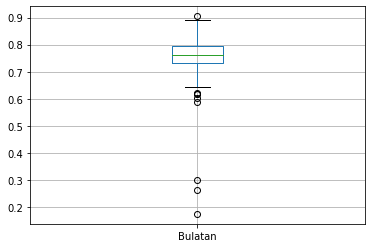

In [22]:
df.boxplot(["Bulatan"])

### Penjelasan :
Berdasarkan plotting di atas, dapat terlihat bahwa distribusi ini berbentuk negatively skewed yang berarti sebagian besar data berada di nilai tinggi. Kemudian, distribusi ini termasuk distribusi yang leptokurtic karena memiliki nilai kurtosis > 3. Mean atau nilai rata-rata dari distribusi ini bernilai 0.761737 dengan standar deviasi bernilai 0.061702. Kemudian, nilai maksimum dari distribusi ini adalah 0.904748 dengan nilai minimum sebesar 0.174590 sehingga jangkauan data dari distribusi ini bernilai 0.730158 dengan IQR yang bernilai 0.064370. Persebaran ini memiliki pencilan pada range data 0.85-1.00, 0.10-0.30, dan 0.50-0.65.

## Ransum

<AxesSubplot:ylabel='Frequency'>

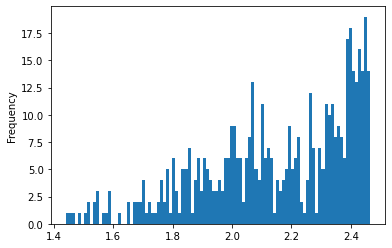

In [23]:
df.Ransum.plot.hist(bins=100)

<AxesSubplot:>

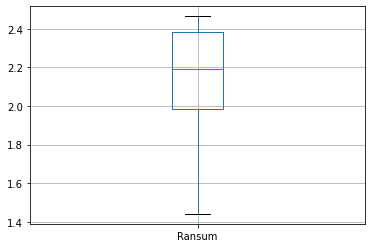

In [24]:
df.boxplot(["Ransum"])

### Penjelasan :
Berdasarkan plotting di atas, dapat terlihat bahwa distribusi ini berbentuk negatively skewed yang berarti sebagian besar data berada di nilai tinggi. Kemudian, distribusi ini termasuk distribusi yang platykurtic karena memiliki nilai kurtosis < 3. Mean atau nilai rata-rata dari distribusi ini bernilai 2.150915 dengan standar deviasi bernilai 0.249767. Kemudian, nilai maksimum dari distribusi ini adalah 2.464809 dengan nilai minimum sebesar 1.440796 sehingga jangkauan data dari distribusi ini bernilai 1.024013 dengan IQR yang bernilai 0.397673. Persebaran ini tidak memiliki pencilan.

# Bagian 3

### Tujuan
Menentukan apakah setiap kolom pada data merupakan distribusi normal atau tidak.
### Cara
1. Membuat plot histogram dari setiap atribut dari data yang diberikan
2. Membuat plot histogram distribusi normal dari atribut data yang diberikan menggunakan metode _bootstrap_, yaitu metode yang akan meng-_generate_ data random berdasarkan rata-rata dan simpangan baku dari atribut terkait, kemudian diplot pada histogram
3. Membuat perbandingan dari kedua plot yang sudah dibuat dengan menggabungkan kedua plot tersebut untuk memberikan gambaran data (perbandingan kasar)
4. Melakukan _Pearson's Chi Squared Test_ dan _Shapiro-Wilk Test_ untuk menentukan seberapa berbeda kedua plot data tersebut (hasilnya kemungkinan akan berbeda-beda tipis karena perbandingannya dengan data yang dibuat secara random)

### Hipotesis
$$
H_{0} : Observed = Expected \\
H_{a} : Observed \neq Expected
$$

### Pearson's Chi Square Test for Goodness of Fit
$$
\chi^{2} = \sum_{i=1}^{n}\frac{(O_{i}-E_{i})^{2}}{E_{i}} \\
O_{i} = Observed Frequency \\
E_{i} = Expected Frequency
$$

### Shapiro-Wilk Test for Normality
$$
W = \frac{\left \{ \sum_{i=1}^{n}a_{i}x_{(i)} \right \}^{2}}{\sum_{i=1}^{n}(x_{i}-\bar{x})^{2}} \\
x_{(i)} = Nilai\:terkecil\:ke-i\:pada\:sampel \\
\bar{x} = Rata-rata\:pada\:sampel \\
a_{i} = Koefisien
$$

In [25]:
# Mengecek normalitas dari graph
def checknormal(attr):
    print('Histogram dari ' + attr + ' dan distribusi normalnya')
    print('-----------------------------------------------------')
    print('Hipotesis null: nilai dari data ' + attr + ' tidak jauh berbeda dari distribusi normal')
    print('Hipotesis alternatif: nilai dari data ' + attr + ' berbeda dengan distribusi normal')
    samples = np.random.normal(np.mean(df[attr]), np.std(df[attr]), size=500)
    stat, p = stats.chisquare(f_obs=df[attr],f_exp=samples)
    checkhypothesis("Pearson's Chi-Squared",p,stat)
    stat, p = stats.shapiro(df[attr])
    checkhypothesis('Shapiro-Wilk',p,stat)
    plt.hist(samples, 40, alpha=0.5, label='Normal', color="blue")
    plt.hist(df[attr], 40, alpha=0.5, label=attr, color="orange")
    plt.legend(loc='upper right')
    plt.show()

# Mengecek hipotesis
def checkhypothesis(test,p,stat):
    print()
    print(test + ' test:')
    alpha = 0.05
    print('p: ' + str(p))
    print('statistik '+ test + ': ' + str(stat))
    if p <= alpha:
        print('Data tidak terdistribusi normal')
    else:
        print('Data terdistribusi normal, gagal menolak H0')

Histogram dari Daerah dan distribusi normalnya
-----------------------------------------------------
Hipotesis null: nilai dari data Daerah tidak jauh berbeda dari distribusi normal
Hipotesis alternatif: nilai dari data Daerah berbeda dengan distribusi normal

Pearson's Chi-Squared test:
p: 0.0
statistik Pearson's Chi-Squared: 221479.9405654713
Data tidak terdistribusi normal

Shapiro-Wilk test:
p: 0.003270698245614767
statistik Shapiro-Wilk: 0.9907860159873962
Data tidak terdistribusi normal


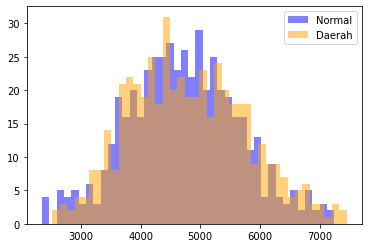

Histogram dari SumbuUtama dan distribusi normalnya
-----------------------------------------------------
Hipotesis null: nilai dari data SumbuUtama tidak jauh berbeda dari distribusi normal
Hipotesis alternatif: nilai dari data SumbuUtama berbeda dengan distribusi normal

Pearson's Chi-Squared test:
p: 0.0
statistik Pearson's Chi-Squared: 3030.823917991788
Data tidak terdistribusi normal

Shapiro-Wilk test:
p: 9.236201213569384e-12
statistik Shapiro-Wilk: 0.9513812065124512
Data tidak terdistribusi normal


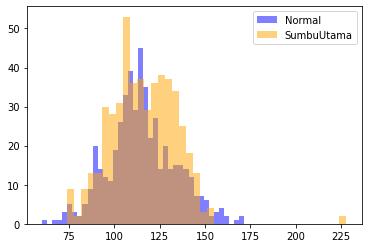

Histogram dari SumbuKecil dan distribusi normalnya
-----------------------------------------------------
Hipotesis null: nilai dari data SumbuKecil tidak jauh berbeda dari distribusi normal
Hipotesis alternatif: nilai dari data SumbuKecil berbeda dengan distribusi normal

Pearson's Chi-Squared test:
p: 0.9999999999904546
statistik Pearson's Chi-Squared: 315.344814932679
Data terdistribusi normal, gagal menolak H0

Shapiro-Wilk test:
p: 0.4234558641910553
statistik Shapiro-Wilk: 0.996778666973114
Data terdistribusi normal, gagal menolak H0


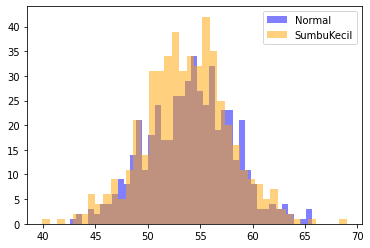

Histogram dari Keunikan dan distribusi normalnya
-----------------------------------------------------
Hipotesis null: nilai dari data Keunikan tidak jauh berbeda dari distribusi normal
Hipotesis alternatif: nilai dari data Keunikan berbeda dengan distribusi normal

Pearson's Chi-Squared test:
p: 1.0
statistik Pearson's Chi-Squared: 1.5203164750757008
Data terdistribusi normal, gagal menolak H0

Shapiro-Wilk test:
p: 1.3151663082081454e-22
statistik Shapiro-Wilk: 0.8309029340744019
Data tidak terdistribusi normal


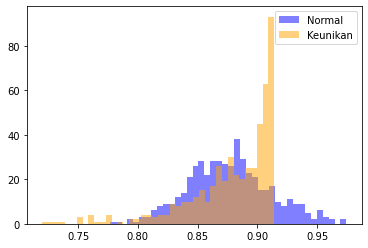

Histogram dari AreaBulatan dan distribusi normalnya
-----------------------------------------------------
Hipotesis null: nilai dari data AreaBulatan tidak jauh berbeda dari distribusi normal
Hipotesis alternatif: nilai dari data AreaBulatan berbeda dengan distribusi normal

Pearson's Chi-Squared test:
p: 0.0
statistik Pearson's Chi-Squared: 242576.03411625882
Data tidak terdistribusi normal

Shapiro-Wilk test:
p: 0.0024847122840583324
statistik Shapiro-Wilk: 0.990435779094696
Data tidak terdistribusi normal


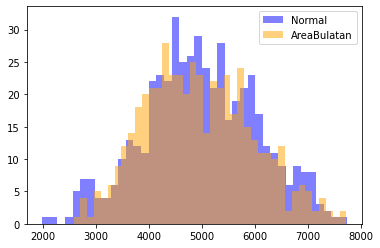

Histogram dari Diameter dan distribusi normalnya
-----------------------------------------------------
Hipotesis null: nilai dari data Diameter tidak jauh berbeda dari distribusi normal
Hipotesis alternatif: nilai dari data Diameter berbeda dengan distribusi normal

Pearson's Chi-Squared test:
p: 6.671994658631065e-23
statistik Pearson's Chi-Squared: 873.9743187379497
Data tidak terdistribusi normal

Shapiro-Wilk test:
p: 0.11834503710269928
statistik Shapiro-Wilk: 0.9951366186141968
Data terdistribusi normal, gagal menolak H0


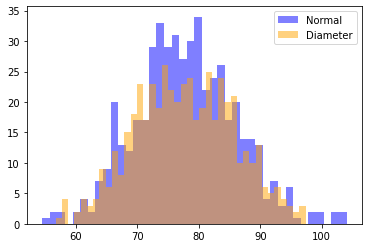

Histogram dari KadarAir dan distribusi normalnya
-----------------------------------------------------
Hipotesis null: nilai dari data KadarAir tidak jauh berbeda dari distribusi normal
Hipotesis alternatif: nilai dari data KadarAir berbeda dengan distribusi normal

Pearson's Chi-Squared test:
p: 1.0
statistik Pearson's Chi-Squared: 14.048578472849966
Data terdistribusi normal, gagal menolak H0

Shapiro-Wilk test:
p: 1.959499836695633e-12
statistik Shapiro-Wilk: 0.9466671347618103
Data tidak terdistribusi normal


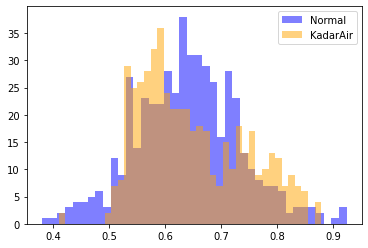

Histogram dari Keliling dan distribusi normalnya
-----------------------------------------------------
Hipotesis null: nilai dari data Keliling tidak jauh berbeda dari distribusi normal
Hipotesis alternatif: nilai dari data Keliling berbeda dengan distribusi normal

Pearson's Chi-Squared test:
p: 0.0
statistik Pearson's Chi-Squared: 4916.3624966620555
Data tidak terdistribusi normal

Shapiro-Wilk test:
p: 9.728394090302572e-09
statistik Shapiro-Wilk: 0.9692449569702148
Data tidak terdistribusi normal


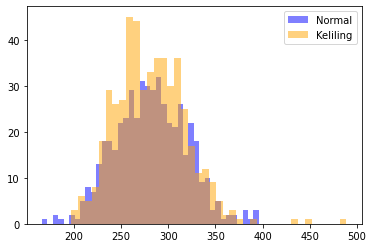

Histogram dari Bulatan dan distribusi normalnya
-----------------------------------------------------
Hipotesis null: nilai dari data Bulatan tidak jauh berbeda dari distribusi normal
Hipotesis alternatif: nilai dari data Bulatan berbeda dengan distribusi normal

Pearson's Chi-Squared test:
p: 1.0
statistik Pearson's Chi-Squared: 5.322983298759263
Data terdistribusi normal, gagal menolak H0

Shapiro-Wilk test:
p: 6.899158691421287e-26
statistik Shapiro-Wilk: 0.7697757482528687
Data tidak terdistribusi normal


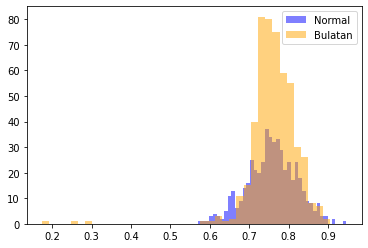

Histogram dari Ransum dan distribusi normalnya
-----------------------------------------------------
Hipotesis null: nilai dari data Ransum tidak jauh berbeda dari distribusi normal
Hipotesis alternatif: nilai dari data Ransum berbeda dengan distribusi normal

Pearson's Chi-Squared test:
p: 1.0
statistik Pearson's Chi-Squared: 25.271251299139067
Data terdistribusi normal, gagal menolak H0

Shapiro-Wilk test:
p: 6.245541108888591e-15
statistik Shapiro-Wilk: 0.9265043139457703
Data tidak terdistribusi normal


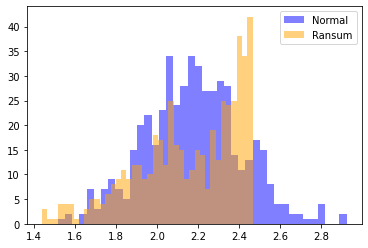

In [26]:
for columns in df2:
    checknormal(str(columns))

# Bagian 4

Melakukan test hipotesis 1 sampel, dengan menuliskan 6 langkah testing dan menampilkan
juga boxplotnya untuk kolom/bagian yang bersesuaian. 

1. Nilai rata-rata Daerah di atas 4700? 
2. Nilai Rata-rata Sumbu Utama tidak sama dengan 116? 
3. Nilai Rata-rata 20 baris pertama kolom Sumbu Kecil bukan 50? 
4. Proporsi nilai Diameter yang lebih dari 85, adalah tidak sama dengan 15% ? 
5. Proporsi nilai Keliling yang kurang dari 100, adalah kurang dari 5% ?

$
1.\ Rumus\ fungsi\ getZ\ :\ \frac{\bar{x} - \mu _0}{\frac{\sigma}{\sqrt{n}}}\\
2.\ Rumus\ fungsi\ getZprop\ :\ \frac{\hat{p} - p_0}{\sqrt{\frac{p_0 q_0}{n}}}\\
\\
Asumsi\ yang\ digunakan\ :\ dataset\ yang\ digunakan\ diperlakukan\ sebagai\ sampel
$

In [27]:
#pendefinisian tes statistik

#parameter col adalah nama kolom yang ingin diuji
#parameter m0 adalah nilai miu 0
#parameter numrow adalah indeks (dimulai dari 1) terakhir data yang ingin diuji
def getZ(col, m0, numrow): 
    return (df[col].iloc[:numrow].mean()-m0)/ (df[col].iloc[:numrow].std()/math.sqrt(df[col].iloc[:numrow].count()))

#parameter col adalah nama kolom yang ingin diuji
#parameter phat adalah nilai p-hat yaitu x/n
#parameter p0 adalah nilai proporsi
def getZprop(col, phat, p0):
    return ((phat-p0)/math.sqrt(p0*(1-p0)/df[col].count()))

## Soal 4.1

Nilai rata-rata Daerah di atas 4700?

$
1.\,{H_0} : \mu = 4700\\
2.\,{H_1} : \mu > 4700\\
3.\,\alpha = 0.05\\
4.\,Tes\ statistik : \frac{\bar{x} - \mu _0}{\frac{\sigma}{\sqrt{n}}}\\ \\
Mencari\ daerah\ kritis\ :
$

In [28]:
#alpha berada pada nilai 0.05, karena tes yang dilakukan adalah 1 tailed test dari kanan, maka p-value = 0.95 sehingga
crit  = stats.norm.ppf(0.95)
print("crit =", crit)

crit = 1.6448536269514722


$
\ Maka\ didapat\ Critical\ area : z\ > z_{0.95}= 1.645\\~\\
5.\ Uji\ statistik\ :
$

In [29]:
z1 = getZ("Daerah", 4700, df["Daerah"].count())
print("z =", z1)

z = 2.2951538242525173


$
6.\ Karena\ z=2.295>1.645,\ sehingga\ nilai\ uji\ terletak\ di\ daerah\ kritis\ maka\ tolak\ H_0\ dan\ terima\ H_1 \\~\\ 
Mencari\ p-value :
$

In [30]:
#mencari p-value, p-value = P(Z > 2.295)
pval1 = 1 - stats.norm.cdf(z1)
print ("p-value =", pval1)

p-value = 0.010862155196799894


$
Karena \ p=0.0109 < 0.05,\ maka\ benar\ untuk\ menolak\ H_0\ dan\ menerima\ H_1 \\~\\
Boxplot\ kolom\ Daerah\ :
$

<AxesSubplot:>

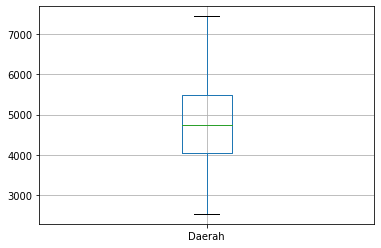

In [31]:
df.boxplot(["Daerah"])

## Soal 4.2

Nilai Rata-rata Sumbu Utama tidak sama dengan 116?

$
1.\, {H_0} : \mu = 116\\
2.\, {H_1} : \mu \neq 116\\
3.\, \alpha = 0.05\\
4.\, Tes\ statistik : \frac{\bar{x} - \mu _0}{\frac{\sigma}{\sqrt{n}}}\\
Mencari\ daerah\ kritis\ :
$

In [32]:
#alpha berada pada nilai 0.05, karena tes yang dilakukan adalah 2 tailed test, maka p-value = 0.025 sehingga
crit1  = stats.norm.ppf(0.025)
print("crit1 =", crit1)
crit2  = stats.norm.ppf(0.975)
print("crit2 =", crit2)

crit1 = -1.9599639845400545
crit2 = 1.959963984540054


$
Maka\ didapat\ critical\ area : z\ < z_{0.025}= -1.96 \ \cap\  z\ > z_{0.975}= 1.96\\~\\
5.\ Uji\ statistik\ :
$

In [33]:
z2 = getZ("SumbuUtama", 116, df["SumbuUtama"].count())
print("z =",z2)

z = 0.05524712326730106


$
6.\ Karena\ -1.96\leq 0.055 \leq 1.96,\ sehingga\ nilai\ uji\ terletak\ pada\ critical\ area\ maka\ dapat\ dinyatakan\ gagal\ menolak\ H_0. \\~\\
Mencari\ p-value\ :
$

In [34]:
#mencari p-value, p-value = 2*P(1-Z < 0.055)
pval2 = 2*(1-stats.norm.cdf(z2))
print ("p-value =", pval2)

p-value = 0.9559415872977521


$
Karena\ 0.955 > 0.05,\ maka \ benar \ gagal\ menolak\ H_0\ karena \ tidak \ ada \ bukti \ yang\ memadai\ untuk\ mengambil\ kesimpulan.\\~\\
Boxplot\ kolom\ SumbuUtama\ :
$

<AxesSubplot:>

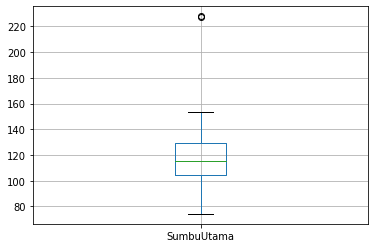

In [35]:
df.boxplot(["SumbuUtama"])

## Soal 4.3

Nilai Rata-rata 20 baris pertama kolom Sumbu Kecil bukan 50?

$
1.\, {H_0} : \mu = 50\\
2.\, {H_1} : \mu \neq 50\\
3.\, \alpha = 0.05\\
4.\, Tes\ statistik : \frac{\bar{x} - \mu _0}{\frac{\sigma}{\sqrt{n}}}\\
Mencari\ daerah\ kritis\ :
$

In [36]:
#mencari daerah kritis
#alpha berada pada nilai 0.05, karena tes yang dilakukan adalah 2 tailed test, maka p-value = 0.025 dan 0.975 sehingga
crit1  = stats.norm.ppf(0.025)
print("crit1 =", crit1)
crit2  = stats.norm.ppf(0.975)
print("crit2 =", crit2)

crit1 = -1.9599639845400545
crit2 = 1.959963984540054


$
Maka\ didapat\ critical\ area : z\ < z_{0.025}= -1.96 \ \cap\  z\ > z_{0.975}= 1.96\\~\\
5.\ Uji\ statistik\ :
$

In [37]:
z3 = getZ("SumbuKecil", 50, 20)
print("z =", z3)

z = 6.478168916968894


$
6.\ Karena\ 6.478 >1.96,\ sehingga\ nilai\ uji\ terletak\ di\ daerah\ kritis\ maka\ tolak\ H_0\ dan\ terima\ H_1 \\~\\
Mencari\ p-value\ :
$

In [38]:
#mencari p-value, p-value = 2*P(1-Z < 6.4781)
pval3 = 2*(1-(stats.norm.cdf(z3)))
print ("p-value =", "{:.16f}".format(float(str(pval3))))

p-value = 0.0000000000928424


$
Karena\ 0.0000000000928424 < 0.05,\ maka \ benar \ untuk\ menolak\ H_0\ dan\ menerima\ H_1\\~\\
Boxplot\ kolom\ SumbuKecil\ :
$

<AxesSubplot:>

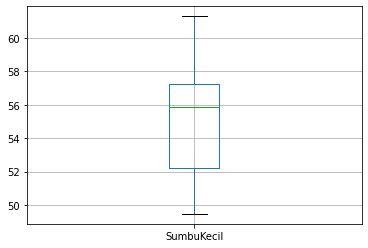

In [39]:
df.iloc[:20].boxplot(["SumbuKecil"])

## Soal 4.4

Proporsi nilai Diameter yang lebih dari 85, adalah tidak sama dengan 15% ?

$
1.\, {H_0} : p = 0.15\\
2.\, {H_1} : p \neq 0.15\\
3.\, \alpha = 0.05\\
4.\, Tes\ statistik : \frac{\hat{p} - p_0}{\sqrt{\frac{p_0 q_0}{n}}}\\
\: \: dengan \  \hat{p} = \frac{x}{n}
$

In [40]:
#mencari p-hat
x = 0
for val in df["Diameter"]:
    if val > 85:
        x= x + 1
phat = x/df["Diameter"].count()
print("p-hat =", phat)

p-hat = 0.194


In [41]:
#mencari daerah kritis
#alpha berada pada nilai 0.05, karena tes yang dilakukan adalah 2 tailed test, maka p-value = 0.025 sehingga
crit1  = stats.norm.ppf(0.025)
print("crit1 =", crit1)
crit2  = stats.norm.ppf(0.975)
print("crit2 =", crit2)

crit1 = -1.9599639845400545
crit2 = 1.959963984540054


$
Maka\ didapat\ critical\ area : z\ < z_{0.025}= -1.96 \ \cap\  z\ > z_{0.975}= 1.96\\~\\
5.\ Uji\ statistik\ :
$

In [42]:
z4 = getZprop("Diameter", phat, 0.15)
print("z =", z4)

z = 2.755386880774658


$
6.\ Karena\ 2.755 > 1.96,\ sehingga\ nilai\ uji\ terletak\ di\ daerah\ kritis\ maka\ tolak\ H_0\ dan\ terima\ H_1 \\~\\
Mencari\ p-value\ :
$

In [43]:
#mencari p-value, p-value = 2*P(Z < 2.755)
pval4 = 2*(1-stats.norm.cdf(z4))
print ("p-value =", pval4)

p-value = 0.005862277168409591


$
Karena\ 0.0058 < 0.05,\ maka \ benar \ untuk\ menolak\ H_0\ dan\ menerima\ H_1\ \\~\\
Boxplot\ kolom\ Diameter\ :
$

<AxesSubplot:>

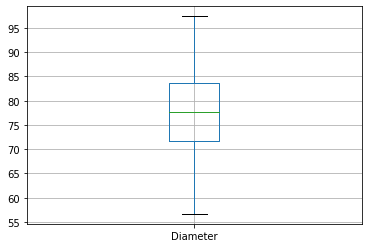

In [44]:
df.boxplot(["Diameter"])

## Soal 4.5

Proporsi nilai Keliling yang kurang dari 100, adalah kurang dari 5% ?

$
1.\, {H_0} : p = 0.05\\
2.\, {H_1} : p < 0.05\\
3.\, \alpha = 0.05\\
4.\, Tes\ statistik : \frac{\hat{p} - p_0}{\sqrt{\frac{p_0 q_0}{n}}}\\
\, \, dengan \,  \hat{p} = \frac{x}{n}
$

In [45]:
#mencari p-hat
x = 0
for val in df["Keliling"]:
    if val < 100:
        x= x + 1
phat = x/df["Keliling"].count()
print("p-hat =", phat)

p-hat = 0.0


In [46]:
#mencari daerah kritis
#alpha berada pada nilai 0.05, karena tes yang dilakukan adalah 1 tailed test dari kiri, maka p-value = 0.05 sehingga
crit  = stats.norm.ppf(0.05)
print("crit =", crit)

crit = -1.6448536269514729


$
Maka\ didapat\ critical\ area : z\ < z_{0.05}= -1.645\\~\\
5.\ Uji\ statistik\ :
$

In [47]:
z5 = getZprop("Keliling", phat, 0.05)
print(z5)

-5.129891760425771


$
Karena\ -5.13 < -1.645,\ sehingga\ nilai\ uji\ terletak\ di\ daerah\ kritis\ maka\ tolak\ H_0\ dan\ terima\ H_1 \\~\\
Mencari\ p-value\ :
$ 

In [48]:
#mencari p-value, p-value = 1-P(Z < -5.13)
pval5 = (1-stats.norm.cdf(abs(z5)))
print ("p-value =", "{:.16f}".format(float(str(pval5))))

p-value = 0.0000001449544141


$
Karena\ 0.0000001449544141 < 0.05,\ maka \ benar \ untuk\ menolak\ H_0\ dan\ menerima\ H_1\\~\\
Boxplot\ kolom\ Keliling\ :
$

<AxesSubplot:>

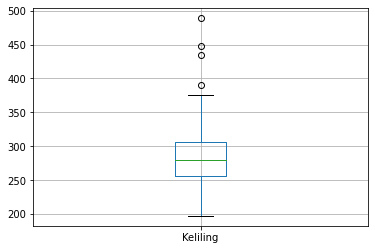

In [49]:
df.boxplot(["Keliling"])

## Bagian 5

### Tujuan
Melakukan test hipotesis 2 sampel, dengan menuliskan 6 langkah testing dan menampilkan
juga boxplotnya untuk kolom/bagian yang bersesuaian.
1. Data kolom AreaBulatan dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata kedua bagian tersebut sama?
2. Data kolom Kadar Air dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata bagian awal lebih besar dari pada bagian akhir sebesar 0.2?
3. Rata-rata 20 baris pertama kolom Bulatan sama dengan 20 baris terakhirnya?
4. Proporsi nilai bagian awal Ransum yang lebih dari 2, adalah lebih besar daripada, proporsi nilai yang sama di bagian akhir Ransum?
5. Bagian awal kolom Diameter memiliki variansi yang sama dengan bagian akhirnya?

### Cara pengerjaan
1. Menentukan hipotesis null
2. Menentukan hipotesis alternatif
3. Menentukan tingkat signifikan (alpha = 0.05)
4. Menentukan uji statistik dan daerah kritis
5. Hitung nilai uji statistik
6. Ambil keputusan

<br>

### Cochran's Sample Size Formula
$$
n = \frac{z^{2}\cdot p\,(1-p)}{e^{2}} \\
e = Allowable\:error \\
p = Standard\:deviation \\
z = z\,score \\
$$

### Two Sample Z-Test for Means
$$
Z = \frac{\bar{X_{1}}-\bar{X_{2}}-\Delta}{\sqrt{(\sigma^{2}_{1}/n_{1})+(\sigma^{2}_{2}/n_{2})}} \\
n_{1,2} = Sample\:size \\
\bar{X}_{1,2} = Sample\:mean \\
\sigma^{2}_{1,2} = Variances \\
\Delta = Hypothesized\:difference\:between\:population\:means
$$

### F-Test to Compare Two Variances
$$
f = \frac {\sigma^{2}_{1}}{\sigma^{2}_{2}} \\
\sigma^{2} = Variances
$$

### Two sample Z-Test for Proportions
$$
Z = \frac{\hat{p_{1}}-\hat{p_{2}}}{\sqrt{\hat{p}(1-\hat{p})(\frac{1}{n_{1}}+\frac{1}{n_{2}})}} \\
\hat{p}_{1,2} = Proportions\:per\:sample \\
\hat{p} = Overall\:sample\:proportions \\
n = Sample\:size
$$

In [50]:
# berdasarkan soal
alpha = 0.05

def nsamplesize(z,p,e):
    return round((z**2 * (p*(1-p)))/e**2)

def drawboxplot(data1,data2,title1,title2):
    fig, axs = plt.subplots(1, 2)
    axs[0].boxplot(data1)
    axs[0].set_title(title1)
    axs[1].boxplot(data2)
    axs[1].set_title(title2)
    
    fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9, hspace=0.4, wspace=0.3)
    
    plt.show()

def samplettest(x1,x2,d,s1,s2,n1,n2):
    return ((x1-x2-d)/math.sqrt(s1/n1 + s2/n2))

def twotestmean(x1,x2,d,var1,var2,n1,n2):
    return ((x1-x2)-d)/math.sqrt((var1/n1)+(var2/n2))

def twotestproportion(p1,p2,p,n1,n2):
    return (p1-p2)/math.sqrt((p*(1-p))*((1/n1)+(1/n2)))

def ftest(var1,var2):
    if (var1 < var2):
        return (var2/var1)
    else:
        return (var1/var2)
    
def ztop(z):
    return norm.cdf(z)

def ptoz(p):
    return norm.ppf(p)

def printzpinfo(z,p):
    print('==================')
    print('nilai z        : ' + "{:.15}".format(z))
    print('nilai p-value  : ' + "{:.15}".format(p))
    print('==================')
    
def tessignifikan(pval,alpha):
    print('==================')
    print('Tes signifikan:')
    if (pval < alpha):
        print('Diketahui bahwa nilai p-value < alpha')
        print('Hipotesis awal benar ditolak')
    else:
        print('Diketahui bahwa nilai p-value >= alpha')
        print('Hipotesis awal tidak seharusnya ditolak')
    print('==================')

## Soal 5.1
Data kolom AreaBulatan dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata kedua bagian tersebut sama?

Soal ini menggunakan **Two Tailed Two Sample Mean Test with Z value** dan critical area berada pada kedua bagian kurva

**Two tailed**: hipotesis mengacu pada "tidak sama dengan" sehingga perlu dibuktikan dari kedua sisi kanan dan kiri <br>
**Two Sample**: Soal ini menguji 2 sampel, yaitu bagian awal dan akhir <br>
**Mean Test**: Soal ini menguji nilai rata-rata dari sampel <br>
**Z value**: jumlah sampel yang dites cukup banyak sehingga menggunakan Z value

$$
H_{0} :\: \mu_{awal}-\mu_{akhir}=0 \\
H_{a} :\: \mu_{awal}-\mu_{akhir}\neq0 \\
\:\\
Z = \frac{\bar{X_{1}}-\bar{X_{2}}-0}{\sqrt{(\sigma^{2}_{1}/n_{1})+(\sigma^{2}_{2}/n_{2})}}
$$

$$ Pada\:kasus\:ini,\:H_{0}\:akan\:ditolak\:ketika\:z < -z_{\alpha/2}\:atau\:z > z_{\alpha/2}$$


### Cara pengerjaan
1. Mencari nilai Z menggunakan two tailed two sample mean test with z value
2. Mencari nilai p menggunakan z-table
3. Membandingkan nilai z dan p dengan alpha

Area Bulatan


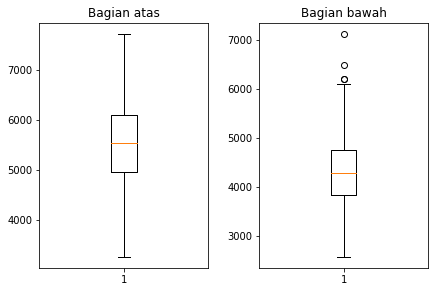


nilai z        : 17.0130366484855
nilai p-value  : 0.0
Keputusan:
Diketahui bahwa nilai Z < -Z alpha/2 atau Z > Z alpha/2
Hipotesis null berhasil ditolak
Kesimpulan: Rata-rata kedua bagian tidak sama
Tes signifikan:
Diketahui bahwa nilai p-value < alpha
Hipotesis awal benar ditolak


In [51]:
df_1 = df.iloc[:250,:]['AreaBulatan']
df_2 = df.iloc[250:,:]['AreaBulatan']
print('Area Bulatan')
drawboxplot(df_1,df_2,'Bagian atas','Bagian bawah')
print()

#two test mean
z = twotestmean(df_1.mean(),df_2.mean(),0,df_1.var(),df_2.var(),df_1.count(),df_2.count())
pval = 2*(1-ztop(abs(z)))
z1 = (ptoz(1-alpha/2))

printzpinfo(z,pval)
print('Keputusan:')
if (z < -z1 or z > z1):
    print('Diketahui bahwa nilai Z < -Z alpha/2 atau Z > Z alpha/2')
    print('Hipotesis null berhasil ditolak')
    print('Kesimpulan: Rata-rata kedua bagian tidak sama')
else:
    print('Diketahui bahwa nilai Z >= -Z alpha/2 atau Z <= Z alpha/2')
    print('Gagal menolak hipotesis null')
    print('Kesimpulan: Rata-rata kedua bagian sama')
tessignifikan(pval,alpha)

## Soal 5.2
Data kolom Kadar Air dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata bagian awal lebih besar dari pada bagian akhir sebesar 0.2?

Soal ini menggunakan **Two Tailed Two Sample Mean Test with Z value** dan critical area berada pada kedua bagian kurva <br>
Nilai 0.2 akan dimasukkan ke dalam rumus dengan hipotesis tetap terpaku pada selisih antara kedua rata-rata sampel (sama dengan) dan hipotesis alternatif tidak sama dengan

**Two tailed**: hipotesis mengacu pada "tidak sama dengan" sehingga perlu dibuktikan dari kedua sisi kanan dan kiri <br>
**Two Sample**: Soal ini menguji 2 sampel, yaitu bagian awal dan akhir <br>
**Mean Test**: Soal ini menguji nilai rata-rata dari sampel <br>
**Z value**: jumlah sampel yang dites cukup banyak sehingga menggunakan Z value

$$
H_{0} :\: \mu_{awal}-\mu_{akhir}=0.2 \\
H_{a} :\: \mu_{awal}-\mu_{akhir}\neq0.2
\:\\
Z = \frac{\bar{X_{1}}-\bar{X_{2}}-\Delta}{\sqrt{(\sigma^{2}_{1}/n_{1})+(\sigma^{2}_{2}/n_{2})}} \\
\Delta = 0.2
$$

$$ Pada\:kasus\:ini,\:H_{0}\:akan\:ditolak\:ketika\:z < -z_{\alpha/2}\:atau\:z > z_{\alpha/2}$$

### Cara pengerjaan
1. Mencari nilai Z menggunakan two tailed two sample mean test with z value
2. Mencari nilai p menggunakan z-table dari nilai z
3. Membandingkan nilai z dan p dengan alpha

Kadar Air


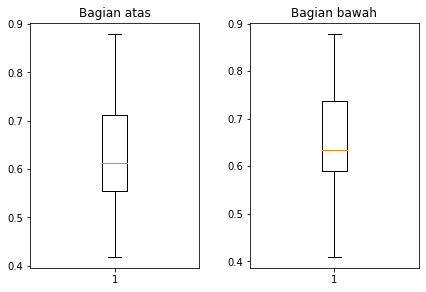


nilai z        : -26.9034442497449
nilai p-value  : 0.0
Keputusan:
Diketahui bahwa nilai Z < -Z alpha/2 atau Z > Z alpha/2
Hipotesis awal berhasil ditolak
Kesimpulan: Rata-rata kedua bagian tidak sama
Tes signifikan:
Diketahui bahwa nilai p-value < alpha
Hipotesis awal benar ditolak


In [52]:
df_3 = df.iloc[:250,:]['KadarAir']
df_4 = df.iloc[250:,:]['KadarAir']
print('Kadar Air')
drawboxplot(df_3,df_4,'Bagian atas','Bagian bawah')
print()

# two test mean
z = twotestmean(df_3.mean(),df_4.mean(),0.2,df_3.var(),df_4.var(),df_3.count(),df_4.count())
pval = 2*(1-ztop(abs(z)))
z1 = (ptoz(1-alpha/2))

printzpinfo(z,pval)
print('Keputusan:')
if (z < -z1 or z > z1):
    print('Diketahui bahwa nilai Z < -Z alpha/2 atau Z > Z alpha/2')
    print('Hipotesis awal berhasil ditolak')
    print('Kesimpulan: Rata-rata kedua bagian tidak sama')
else:
    print('Diketahui bahwa nilai Z >= -Z alpha/2 atau Z <= Z alpha/2')
    print('Gagal menolak H0')
    print('Kesimpulan: Rata-rata kedua bagian sama')
tessignifikan(pval,alpha)

## Soal 5.3
Rata-rata 20 baris pertama kolom Bulatan sama dengan 20 baris terakhirnya?

Soal ini menggunakan **Two Tailed Two Sample Mean Test with Z value** dan critical area berada pada kedua bagian kurva

**Two tailed**: hipotesis mengacu pada "tidak sama dengan" sehingga perlu dibuktikan dari kedua sisi kanan dan kiri <br>
**Two Sample**: Soal ini menguji 2 sampel, yaitu bagian awal dan akhir <br>
**Mean Test**: Soal ini menguji nilai rata-rata dari sampel <br>
**Z value**: jumlah sampel yang dites cukup banyak sehingga menggunakan Z value

$$
H_{0} :\: \mu_{awal}-\mu_{akhir}=0 \\
H_{a} :\: \mu_{awal}-\mu_{akhir}\neq0 \\
\:\\
Z = \frac{\bar{X_{1}}-\bar{X_{2}}-0}{\sqrt{(\sigma^{2}_{1}/n_{1})+(\sigma^{2}_{2}/n_{2})}}
$$

$$ Pada\:kasus\:ini,\:H_{0}\:akan\:ditolak\:ketika\:z < -z_{\alpha/2}\:atau\:z > z_{\alpha/2}$$

### Cara pengerjaan
1. Mencari nilai Z menggunakan two tailed two sample mean test with z value
2. Mencari nilai p menggunakan z-table dari nilai z
3. Membandingkan nilai z dan p dengan alpha

Bulatan


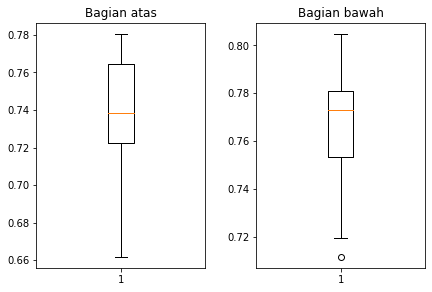


nilai z        : -3.37922686331239
nilai p-value  : 0.000726899974585526
Keputusan:
Diketahui bahwa nilai Z < -Z alpha/2 atau Z > Z alpha/2
Hipotesis awal berhasil ditolak
Kesimpulan: Rata-rata kedua bagian tidak sama
Tes signifikan:
Diketahui bahwa nilai p-value < alpha
Hipotesis awal benar ditolak


In [53]:
df_5 = df.iloc[:20]['Bulatan']
df_6 = df.iloc[-20:]['Bulatan']
print('Bulatan')
drawboxplot(df_5,df_6,'Bagian atas','Bagian bawah')
print()

z = twotestmean(df_5.mean(),df_6.mean(),0,df_5.var(),df_6.var(),df_5.count(),df_6.count())
z1 = (ptoz(1-alpha/2))
pval = 2*(1-ztop(abs(z)))

printzpinfo(z,pval)
print('Keputusan:')
if (z < -z1 or z > z1):
    print('Diketahui bahwa nilai Z < -Z alpha/2 atau Z > Z alpha/2')
    print('Hipotesis awal berhasil ditolak')
    print('Kesimpulan: Rata-rata kedua bagian tidak sama')
else:
    print('Diketahui bahwa nilai Z >= -Z alpha/2 atau Z <= Z alpha/2')
    print('Gagal menolak H0')
    print('Kesimpulan: Rata-rata kedua bagian sama')
tessignifikan(pval,alpha)

## Soal 5.4
Proporsi nilai bagian awal Ransum yang lebih dari 2, adalah lebih besar daripada, proporsi nilai yang sama di bagian akhir Ransum?

Soal ini menggunakan **One Tailed Two Sample Proportion Test with Z value** dan critical area berada pada bagian kanan kurva

**One tailed**: hipotesis mengacu pada "lebih besar dari" sehingga hanya perlu dibuktikan pada satu sisi saja <br>
**Two Sample**: Soal ini menguji 2 sampel, yaitu bagian awal dan akhir <br>
**Proportion Test**: Soal ini menguji nilai proporsi dari sebuah sampel <br>
**Z value**: jumlah sampel yang dites cukup banyak sehingga menggunakan Z value

$$
H_{0} :\: \hat{p}_{awal}-\hat{p}_{akhir}=0 \\
H_{a} :\: \hat{p}_{awal}-\hat{p}_{akhir}>0 \\
\: \\
Z = \frac{\hat{p_{1}}-\hat{p_{2}}}{\sqrt{\hat{p}(1-\hat{p})(\frac{1}{n_{1}}+\frac{1}{n_{2}})}} \\
$$

$$ Pada\:kasus\:ini,\:H_{0}\:akan\:ditolak\:ketika\:z > z_{\alpha} $$

### Cara pengerjaan
1. Mencari nilai Z menggunakan one tailed two sample proportion test
2. Mencari nilai p menggunakan z-table dari nilai z
3. Membandingkan nilai z dan p dengan alpha

Ransum


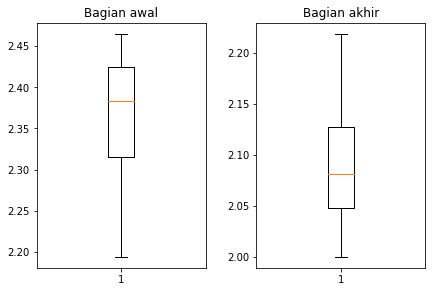


p awal    : 0.996
p akhir   : 0.464
p overall : 0.73
nilai z        : 13.3974864556102
nilai p-value  : 0.0
Diketahui bahwa nilai Z > Z alpha
Hipotesis awal berhasil ditolak
Kesimpulan: Proporsi awal lebih besar dari proporsi akhir
Tes signifikan:
Diketahui bahwa nilai p-value < alpha
Hipotesis awal benar ditolak


In [54]:
df_7 = df.iloc[:250,:]['Ransum'][df.Ransum > 2]
df_8 = df.iloc[250:,:]['Ransum'][df.Ransum > 2]
print('Ransum')
drawboxplot(df_7,df_8,'Bagian awal','Bagian akhir')
print()

#nilai yang dibutuhkan dalam rumus
n1 = 250
n2 = 250
p1 = df_7.count()
p2 = df_8.count()
paw = p1/n1
pak = p2/n2
povr = (p1+p2)/(n1+n2)

#two test proportion
z = twotestproportion(paw,pak,povr,n1,n2)
z1 = ptoz(1-alpha)
pval = 1-ztop(z)

print('p awal    : ' + str(paw))
print('p akhir   : ' + str(pak))
print('p overall : ' + str(povr))
printzpinfo(z,pval)
if (z > z1):
    print('Diketahui bahwa nilai Z > Z alpha')
    print('Hipotesis awal berhasil ditolak')
    print('Kesimpulan: Proporsi awal lebih besar dari proporsi akhir')
else:
    print('Diketahui bahwa nilai Z <= Z alpha')
    print('Gagal menolak H0')
    print('Kesimpulan: Proporsi kedua bagian sama')
tessignifikan(pval,alpha)

## Soal 5.5
Bagian awal kolom Diameter memiliki variansi yang sama dengan bagian akhirnya?

Soal ini menggunakan **Two Tailed Two Sample F-Test** dan critical area berada pada kedua bagian kurva

**Two tailed**: hipotesis mengacu pada "tidak sama" sehingga perlu dibuktikan dari kedua bagian sisi <br>
**Two Sample**: Soal ini menguji 2 sampel, yaitu bagian awal dan akhir <br>
**F Test**: Soal ini menguji nilai variansi dari sebuah sampel

$$
H_{0} :\: \sigma^{2}_{awal}-\sigma^{2}_{akhir} = 0 \\
H_{a} :\: \sigma^{2}_{awal}-\sigma^{2}_{akhir} \neq0\\
\:\\
f = \frac {\sigma^{2}_{1}}{\sigma^{2}_{2}}\\
v_{1} = n_{1}-1 \\
v_{2} = n_{2}-1 \\
v = derajat\:kebebasan
$$

$$ Pada\:kasus\:ini,\:H_{0}\:akan\:ditolak\:ketika\:f < f_{1-\alpha/2}(v1,v2)\:atau\:f > f_{\alpha/2}(v1,v2)$$

Diameter


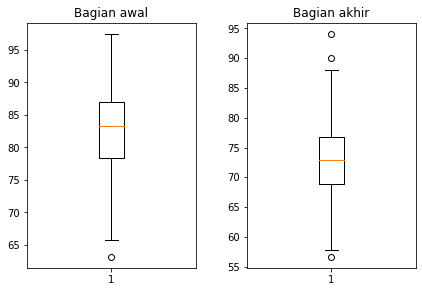


f value                       : 1.083878022042188
p value                       : 0.5255791840378787
upper bound of critical value : 1.2827228078241388
lower bound of critical value : 0.7795916576054988
F-Test:
Diketahui bahwa nilai f <= upper bound atau >= lower bound
Gagal menolak H0
Kesimpulan: Variansi kedua bagian sama


In [55]:
df_9 = df.iloc[:250,:]['Diameter']
df_10 = df.iloc[250:,:]['Diameter']
print('Diameter')
drawboxplot(df_9,df_10,'Bagian awal','Bagian akhir')
print()

# degree of freedom
degfr9 = df_9.count()-1
degfr10 = df_10.count()-1

# f test
fval = ftest(df_9.var(),df_10.var())
pval = 2*(1-fff.cdf(fval,degfr10,degfr9))
ub = fff.ppf(q=1-alpha/2,dfn=degfr9,dfd=degfr10)
lb = 1 / (fff.ppf(q=1-alpha/2,dfn=degfr9,dfd=degfr10))

print('f value                       : ' + str(fval))
print('p value                       : ' + str(pval))
print('upper bound of critical value : ' + str(ub))
print('lower bound of critical value : ' + str(lb))
print('==================')
print('F-Test:')
if (fval > ub or fval < lb):
    print('Diketahui bahwa nilai f > upper bound atau < lower bound')
    print('Hipotesis awal berhasil ditolak')
    print('Kesimpulan: Variansi kedua bagian berbeda')
else:
    print('Diketahui bahwa nilai f <= upper bound atau >= lower bound')
    print('Gagal menolak H0')
    print('Kesimpulan: Variansi kedua bagian sama')

# Bagian 6

Test korelasi: tentukan apakah setiap kolom non-target berkorelasi dengan kolom target,
dengan menggambarkan juga scatter plot nya. Gunakan correlation test.

## Korelasi Kelas - Daerah

In [56]:
print("koefisien korelasi =", stats.pearsonr(df["Daerah"], df["Kelas"])[0])

koefisien korelasi = -0.6027466517416653


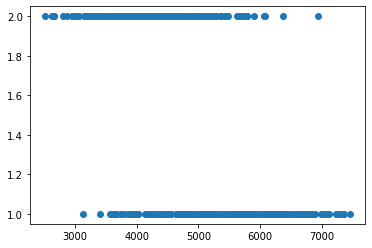

In [57]:
plt.scatter(df["Daerah"], df["Kelas"])
plt.show()

Karena koefisien relasi bernilai negatif maka, hubungan antara kolom Daerah dengan kolom Kelas cenderung berbanding terbalik dengan kekuatan korelasi yang kuat

## Korelasi Kelas - SumbuUtama

In [58]:
print("koefisien korelasi =", stats.pearsonr(df["SumbuUtama"], df["Kelas"])[0])

koefisien korelasi = -0.7130906104204586


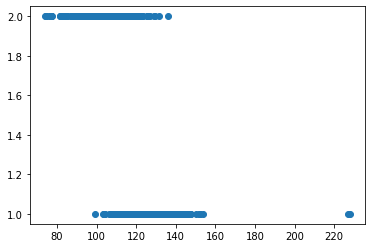

In [59]:
plt.scatter(df["SumbuUtama"], df["Kelas"])
plt.show()

Karena koefisien relasi bernilai negatif maka, hubungan antara kolom SumbuUtama dengan kolom Kelas cenderung berbanding terbalik dengan kekuatan korelasi yang kuat

## Korelasi Kelas - SumbuKecil

In [60]:
print("koefisien korelasi =", stats.pearsonr(df["SumbuKecil"], df["Kelas"])[0])

koefisien korelasi = -0.1529751733553502


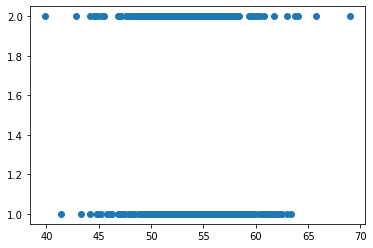

In [61]:
plt.scatter(df["SumbuKecil"], df["Kelas"])
plt.show()

Karena koefisien relasi bernilai negatif maka, hubungan antara kolom SumbuKecil dengan kolom Kelas cenderung berbanding terbalik dengan kekuatan korelasi yang lemah

## Korelasi Kelas - Keunikan

In [62]:
print("koefisien korelasi =", stats.pearsonr(df["Keunikan"], df["Kelas"])[0])

koefisien korelasi = -0.7304563686511918


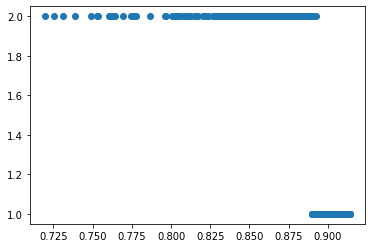

In [63]:
plt.scatter(df["Keunikan"], df["Kelas"])
plt.show()

Karena koefisien relasi bernilai negatif maka, hubungan antara kolom Keunikah dengan kolom Kelas cenderung berbanding terbalik dengan kekuatan korelasi yang kuat

## Korelasi Kelas - AreaBulatan

In [64]:
print("koefisien korelasi =", stats.pearsonr(df["AreaBulatan"], df["Kelas"])[0])

koefisien korelasi = -0.6073125434153747


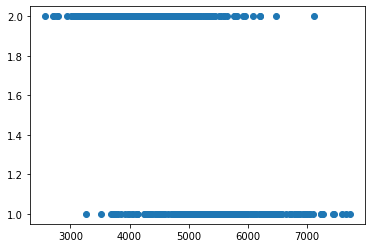

In [65]:
plt.scatter(df["AreaBulatan"], df["Kelas"])
plt.show()

Karena koefisien relasi bernilai negatif maka, hubungan antara kolom AreaBulatan dengan kolom Kelas cenderung berbanding terbalik dengan kekuatan korelasi yang kuat

## Korelasi Kelas - Diameter

In [66]:
print("koefisien korelasi =", stats.pearsonr(df["Diameter"], df["Kelas"])[0])

koefisien korelasi = -0.6025356896618808


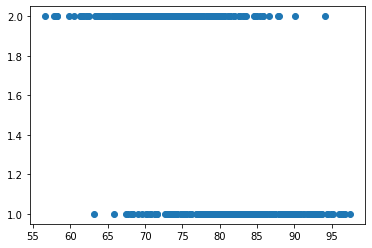

In [67]:
plt.scatter(df["Diameter"], df["Kelas"])
plt.show()

Karena koefisien relasi bernilai negatif maka, hubungan antara kolom Diameter dengan kolom Kelas cenderung berbanding terbalik dengan kekuatan korelasi yang kuat

## Korelasi Kelas - KadarAir

In [68]:
print("koefisien korelasi =", stats.pearsonr(df["KadarAir"], df["Kelas"])[0])

koefisien korelasi = 0.13434422605727633


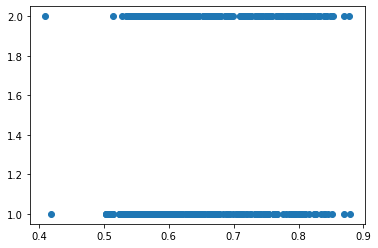

In [69]:
plt.scatter(df["KadarAir"], df["Kelas"])
plt.show()

Karena koefisien relasi bernilai positif maka, hubungan antara kolom Daerah dengan kolom Kelas cenderung berbanding lurus dengan kekuatan korelasi yang lemah

## Korelasi Kelas - Keliling

In [70]:
print("koefisien korelasi =", stats.pearsonr(df["Keliling"], df["Kelas"])[0])

koefisien korelasi = -0.634860745475685


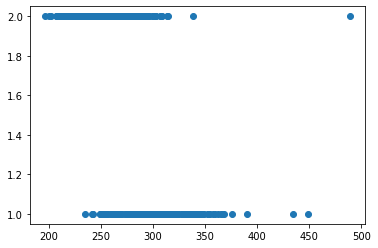

In [71]:
plt.scatter(df["Keliling"], df["Kelas"])
plt.show()

Karena koefisien relasi bernilai negatif maka, hubungan antara kolom Keliling dengan kolom Kelas cenderung berbanding terbalik dengan kekuatan korelasi yang kuat

## Korelasi Kelas - Bulatan

In [72]:
print("koefisien korelasi =", stats.pearsonr(df["Bulatan"], df["Kelas"])[0])

koefisien korelasi = 0.5450045317240073


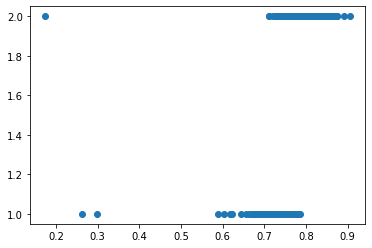

In [73]:
plt.scatter(df["Bulatan"], df["Kelas"])
plt.show()

Karena koefisien relasi bernilai positif maka, hubungan antara kolom Bulatan dengan kolom Kelas cenderung berbanding lurus dengan kekuatan korelasi yang kuat

## Korelasi Kelas - Ransum

In [74]:
print("koefisien korelasi =", stats.pearsonr(df["Ransum"], df["Kelas"])[0])

koefisien korelasi = -0.8399038681287483


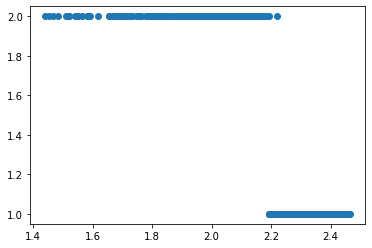

In [75]:
plt.scatter(df["Ransum"], df["Kelas"])
plt.show()

Karena koefisien relasi bernilai negatif maka, hubungan antara kolom Ransum dengan kolom Kelas cenderung berbanding terbalik dengan kekuatan korelasi yang kuat